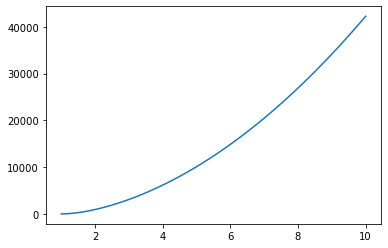

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go


def neo_hookean(F, E=1000, nu=0.2):
    mu = E / (2 * (1 + nu))
    la = E * nu / ((1 + nu) * (1 - 2 * nu)) # Lame parameters

    J = np.linalg.det(F)
    return mu / 2 * (np.trace(F.transpose() @ F) - len(F)) - mu * np.log(J) + la / 2 * np.log(J)**2


dim = 2
sigma = np.arange(1, 10, 1e-3)
Psi = np.array([neo_hookean(np.eye(dim) * sig) for sig in sigma])

plt.figure()
plt.plot(sigma, Psi)
plt.savefig('sigma_times_I.png')
# plt.show()


sigma1 = np.arange(0.5, 2, 1e-1)
sigma2 = np.arange(0.5, 2, 1e-1)
Psi = np.zeros((len(sigma1), len(sigma2)), dtype=float)
for i, sig1 in enumerate(sigma1):
    for j, sig2 in enumerate(sigma2):
        Psi[i, j] = neo_hookean(np.array([[sig1, 0.], [0., sig2]]))

# plt.figure()
# ax = plt.axes(projection='3d')
# ax.plot_surface(sigma1, sigma2, Psi, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none')
# plt.show()

fig = go.Figure(data=[go.Surface(z=Psi, x=sigma1, y=sigma2)])
fig.update_layout(title='2d Psi Neo Hookean', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()